In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
all_logical_error_rates_CNN_G = jnp.load("data/environmentCNN_CNN-G_error_rates_p01_nu500.npy")
all_logical_error_rates_CNN_B = jnp.load("data/environmentCNN_CNN-B_error_rates_p01_nu500.npy")
all_logical_error_rates_PML = jnp.load("data/environmentPML_error_rates_p01_nu500.npy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


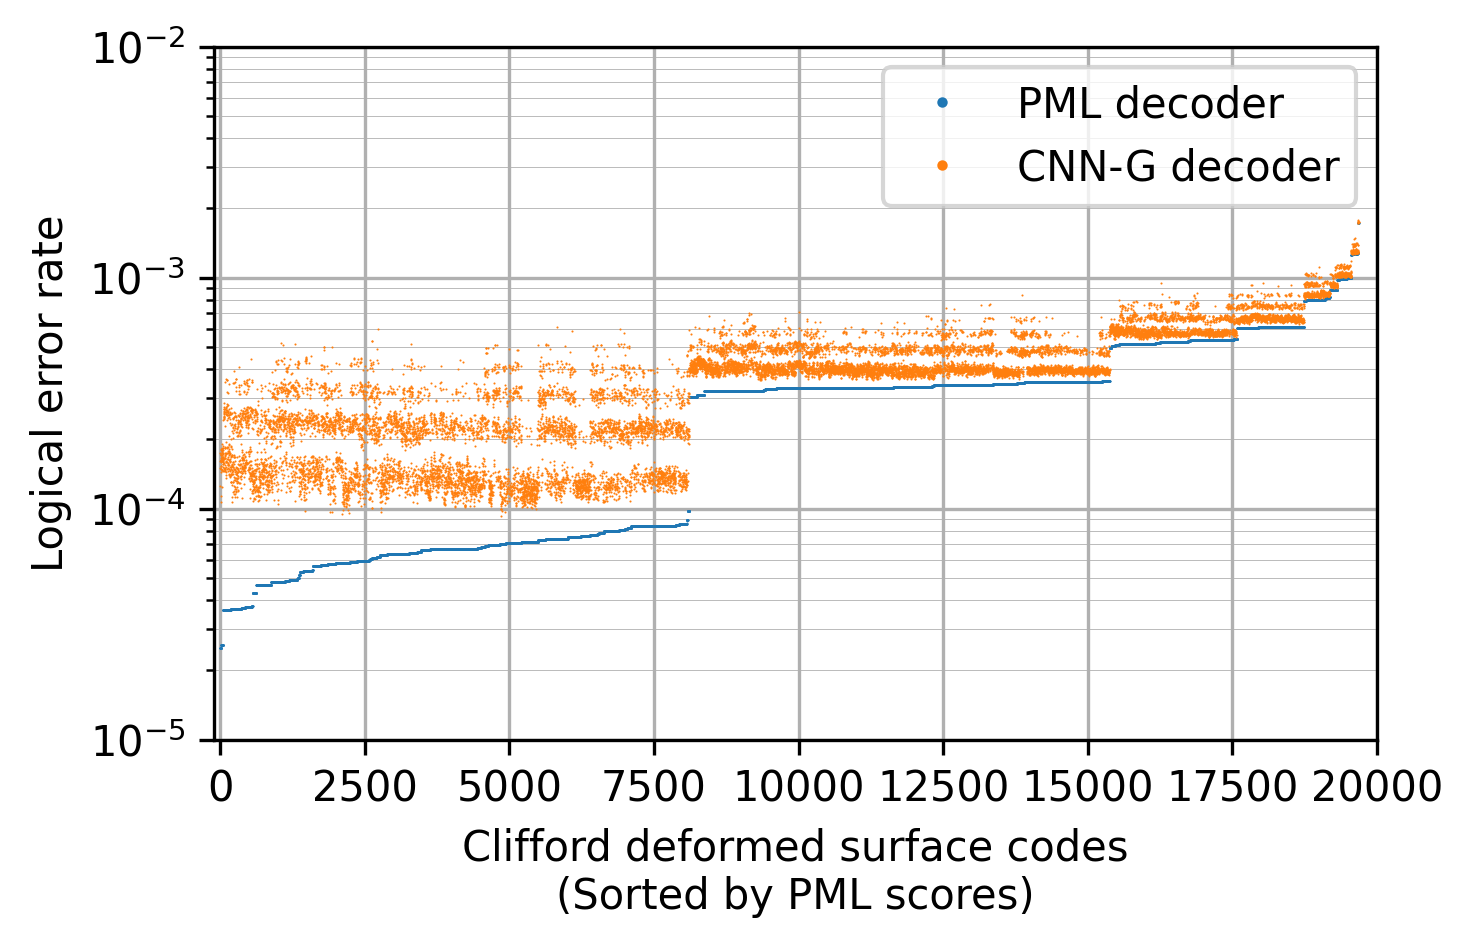

In [3]:
sorted_order = all_logical_error_rates_PML.argsort()
name = "LER-Comparison-sorted-PML"
# sorted_order = all_logical_error_rates_CNN_G.argsort()
# name = "LER-Comparison-sorted-CNN-G"

plt.figure(dpi=300, figsize=(5,3))
# plt.plot(all_logical_error_rates_CNN_B[sorted_order], '.', ms=1, label="CNN-B decoder", markeredgewidth=0)
plt.plot(all_logical_error_rates_PML[sorted_order], '.', ms=1, mew=0, label="PML decoder")
plt.plot(all_logical_error_rates_CNN_G[sorted_order], '.', ms=1, mew=0, label="CNN-G decoder")
plt.yscale('log')
plt.xlabel("Clifford deformed surface codes\n(Sorted by PML scores)")
plt.ylabel("Logical error rate")
plt.xlim(-100,20000)
plt.ylim(1E-5,1E-2)
plt.grid()
plt.grid(which="minor", lw=0.2)
plt.legend(markerscale=5)

plt.savefig(f"figs/{name}.eps", dpi=300, bbox_inches='tight')
plt.savefig(f"figs/{name}.pdf", dpi=300, bbox_inches='tight')
plt.savefig(f"figs/{name}.png", dpi=300, bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


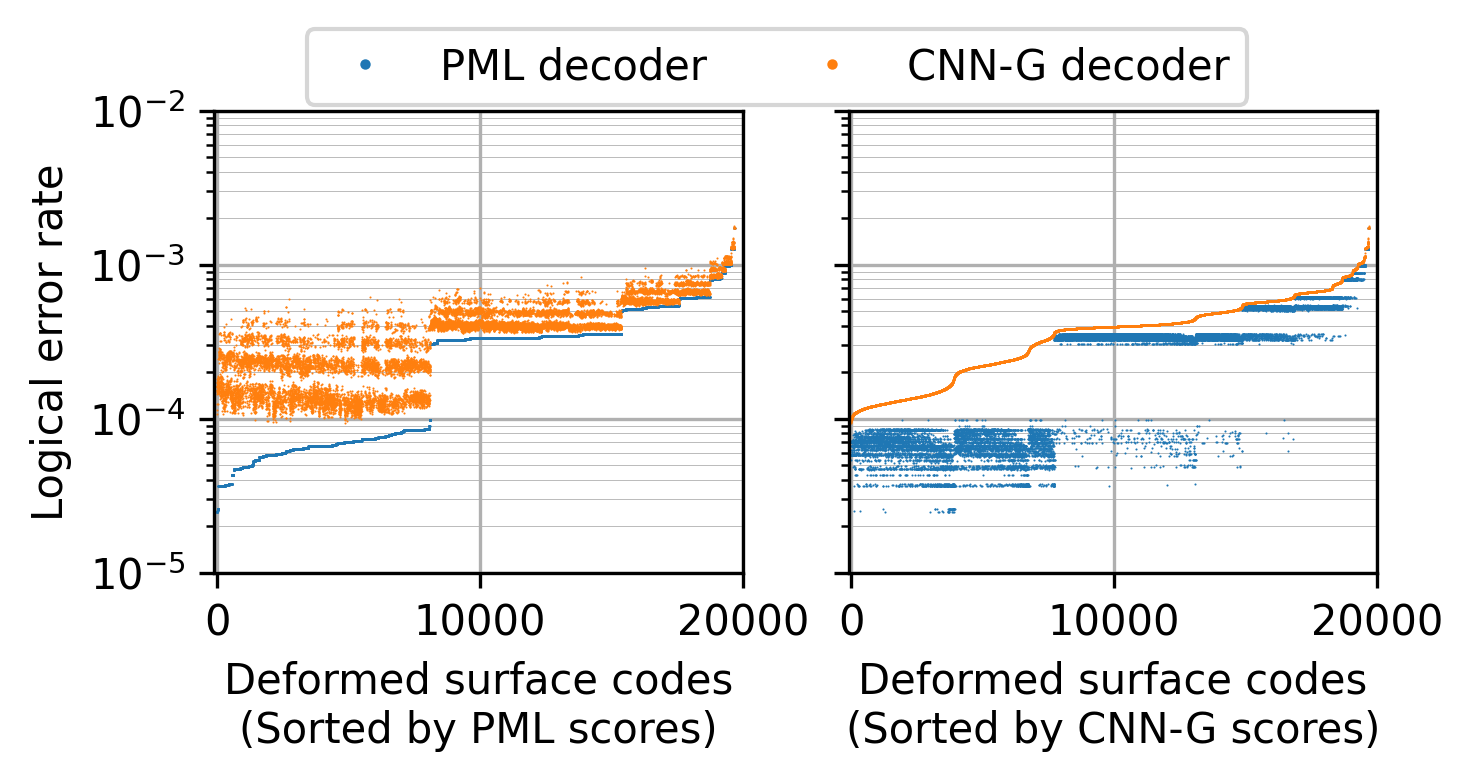

In [8]:
sorted_order = [
    all_logical_error_rates_PML.argsort(),
    all_logical_error_rates_CNN_G.argsort()
]
name = "LER-Comparison-both"

fig, axs = plt.subplots(1, 2, dpi=300, figsize=(5,2), sharey=True)
for i in range(2):
    axs[i].plot(all_logical_error_rates_PML[sorted_order[i]], '.', ms=1, mew=0, label="PML decoder")
    axs[i].plot(all_logical_error_rates_CNN_G[sorted_order[i]], '.', ms=1, mew=0, label="CNN-G decoder")
    axs[i].set_yscale('log')
    axs[i].set_xlabel(f"Deformed surface codes\n(Sorted by {['PML', 'CNN-G'][i]} scores)")
    axs[i].set_xlim(-100,20000)
    axs[i].set_ylim(1E-5,1E-2)
    axs[i].grid()
    axs[i].grid(which="minor", lw=0.2)
    if i == 0:
        axs[i].set_ylabel("Logical error rate")
        fig.legend(markerscale=5, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

plt.savefig(f"figs/{name}.eps", dpi=300, bbox_inches='tight')
plt.savefig(f"figs/{name}.pdf", dpi=300, bbox_inches='tight')
plt.savefig(f"figs/{name}.png", dpi=300, bbox_inches='tight')

plt.show()